
# Feature evaluation
Using the extracted features from create_features_from_PC-GITA.py to plot and evastigate the features. 

### Imports

In [1]:
import numpy as np
import pandas as pandas

from functions import *
from constants import *
from definition_of_data_and_feature_groups import *

# Setup for the experiment 

In [2]:
# Seed number 
seed_number = 42
np.random.seed(seed_number) 

# Define where we get the information from: 
dataset = "GITA" # Eiter GITA or EWA.
feature_sheet_name = "GITA-all"  # "GITA-all" # "EWA-100" # EWA-balanced-69 # Sheet name we want to get features from. 
fold_file = "kfold-groups-tsv.csv" # tsv, mf or ewa. 

# Features and datatypes is choosen later on 

# Functions for future plotting 

# Data processing 
- Get features, metadata and fold info
- Change all ID columns to be on the same form as fold info --> Like: "ID" and "A0013 or AC0013"
- Add metadata columns to feature info 
- Restructure the data.

In [3]:
feature_path = personal_path_to_code + '/Features.xlsx'   # Defines path to feature folder to use. 
features = pandas.read_excel(feature_path, sheet_name=feature_sheet_name)

metadata_path = os.path.join(personal_path_to_PC_GITA,'PCGITA_metadata.xlsx')
metadata = pandas.read_excel(metadata_path)

if dataset == "GITA":
    metadata_path = os.path.join(personal_path_to_PC_GITA,'PCGITA_metadata.xlsx')
    metadata = pandas.read_excel(metadata_path)
    metadata = restructure_id(metadata)
    
elif dataset == "EWA": 
    metadata_path = os.path.join(personal_path_to_EWA_DB,'SPEAKERS.TSV')
    metadata=pandas.read_csv(metadata_path,sep='\t') # Get all metadata 
    metadata = metadata.rename(columns={"SPEAKER_CODE": "ID"}) # Restructure IDs to be called "ID". 
    metadata = metadata.loc[metadata['ID'].isin(list(features["ID"]))] # Extract the data with the IDs from the feature data. 

fold_info_path = os.path.join(personal_path_to_balanced_folds, fold_file) # File where we have the fold distribution saved. 
fold_info = pandas.read_csv(fold_info_path)

metadata_columns =  ["AGE"] 
fold_info_columns = ["Sex", "Fold"]
feature_info_columns = ["ID", "Utterance", "Utterance type", "Group"]

# patient_info_columns will be used later on to remove all metadata and then also want to remove id. 
patient_info_columns = feature_info_columns + metadata_columns + fold_info_columns

# Add metadata and fold info: 
features = add_columns_to_dataframe(features, metadata, metadata_columns)
features = add_columns_to_dataframe(features, fold_info, fold_info_columns)

# Remove NaN
features = remove_NaN(features, patient_info_columns, print_out = False)

features = features.drop(columns="Unnamed: 0")

# Creating a feature table summaring the average and std values: 

In [4]:
avg = ['avg DF0', 'avg DDF0', 'avg Jitter', 'avg Shimmer', 'avg apq', 'avg ppq', 'avg logE',
'avg BBEon_1', 'avg BBEon_2', 'avg BBEon_3', 'avg BBEon_4', 'avg BBEon_5', 'avg BBEon_6', 'avg BBEon_7', 'avg BBEon_8', 'avg BBEon_9', 'avg BBEon_10', 'avg BBEon_11', 'avg BBEon_12', 'avg BBEon_13', 'avg BBEon_14', 'avg BBEon_15', 'avg BBEon_16', 'avg BBEon_17', 'avg BBEon_18', 'avg BBEon_19', 'avg BBEon_20', 'avg BBEon_21', 'avg BBEon_22', 'avg MFCCon_1', 'avg MFCCon_2', 'avg MFCCon_3', 'avg MFCCon_4', 'avg MFCCon_5', 'avg MFCCon_6', 'avg MFCCon_7', 'avg MFCCon_8', 'avg MFCCon_9', 'avg MFCCon_10', 'avg MFCCon_11', 'avg MFCCon_12', 'avg DMFCCon_1', 'avg DMFCCon_2', 'avg DMFCCon_3', 'avg DMFCCon_4', 'avg DMFCCon_5', 'avg DMFCCon_6', 'avg DMFCCon_7', 'avg DMFCCon_8', 'avg DMFCCon_9', 'avg DMFCCon_10', 'avg DMFCCon_11', 'avg DMFCCon_12', 'avg DDMFCCon_1', 'avg DDMFCCon_2', 'avg DDMFCCon_3', 'avg DDMFCCon_4', 'avg DDMFCCon_5', 'avg DDMFCCon_6', 'avg DDMFCCon_7', 'avg DDMFCCon_8', 'avg DDMFCCon_9', 'avg DDMFCCon_10', 'avg DDMFCCon_11', 'avg DDMFCCon_12', 'avg BBEoff_1', 'avg BBEoff_2', 'avg BBEoff_3', 'avg BBEoff_4', 'avg BBEoff_5', 'avg BBEoff_6', 'avg BBEoff_7', 'avg BBEoff_8', 'avg BBEoff_9', 'avg BBEoff_10', 'avg BBEoff_11', 'avg BBEoff_12', 'avg BBEoff_13', 'avg BBEoff_14', 'avg BBEoff_15', 'avg BBEoff_16', 'avg BBEoff_17', 'avg BBEoff_18', 'avg BBEoff_19', 'avg BBEoff_20', 'avg BBEoff_21', 'avg BBEoff_22', 'avg MFCCoff_1', 'avg MFCCoff_2', 'avg MFCCoff_3', 'avg MFCCoff_4', 'avg MFCCoff_5', 'avg MFCCoff_6', 'avg MFCCoff_7', 'avg MFCCoff_8', 'avg MFCCoff_9', 'avg MFCCoff_10', 'avg MFCCoff_11', 'avg MFCCoff_12', 'avg DMFCCoff_1', 'avg DMFCCoff_2', 'avg DMFCCoff_3', 'avg DMFCCoff_4', 'avg DMFCCoff_5', 'avg DMFCCoff_6', 'avg DMFCCoff_7', 'avg DMFCCoff_8', 'avg DMFCCoff_9', 'avg DMFCCoff_10', 'avg DMFCCoff_11', 'avg DMFCCoff_12', 'avg DDMFCCoff_1', 'avg DDMFCCoff_2', 'avg DDMFCCoff_3', 'avg DDMFCCoff_4', 'avg DDMFCCoff_5', 'avg DDMFCCoff_6', 'avg DDMFCCoff_7', 'avg DDMFCCoff_8', 'avg DDMFCCoff_9', 'avg DDMFCCoff_10', 'avg DDMFCCoff_11', 'avg DDMFCCoff_12', 'avg F1', 'avg DF1', 'avg DDF1', 'avg F2', 'avg DF2', 'avg DDF2',
'F0avg','F0tiltavg','F0mseavg','1F0mean', 'lastF0avg', 'avgEvoiced','avgtiltEvoiced','avgmseEvoiced','avg1Evoiced',   'avglastEvoiced','avgEunvoiced', 'avgtiltEunvoiced', 'avgmseEunvoiced', 'avg1Eunvoiced', 'avglastEunvoiced', 'avgdurvoiced', 'avgdurunvoiced', 'avgdurpause']
 
std =['std DF0', 'std DDF0', 'std Jitter', 'std Shimmer', 'std apq', 'std ppq', 'std logE',
 'std BBEon_1', 'std BBEon_2', 'std BBEon_3', 'std BBEon_4', 'std BBEon_5', 'std BBEon_6', 'std BBEon_7', 'std BBEon_8', 'std BBEon_9', 'std BBEon_10', 'std BBEon_11', 'std BBEon_12', 'std BBEon_13', 'std BBEon_14', 'std BBEon_15', 'std BBEon_16', 'std BBEon_17', 'std BBEon_18', 'std BBEon_19', 'std BBEon_20', 'std BBEon_21', 'std BBEon_22', 'std MFCCon_1', 'std MFCCon_2', 'std MFCCon_3', 'std MFCCon_4', 'std MFCCon_5', 'std MFCCon_6', 'std MFCCon_7', 'std MFCCon_8', 'std MFCCon_9', 'std MFCCon_10', 'std MFCCon_11', 'std MFCCon_12', 'std DMFCCon_1', 'std DMFCCon_2', 'std DMFCCon_3', 'std DMFCCon_4', 'std DMFCCon_5', 'std DMFCCon_6', 'std DMFCCon_7', 'std DMFCCon_8', 'std DMFCCon_9', 'std DMFCCon_10', 'std DMFCCon_11', 'std DMFCCon_12', 'std DDMFCCon_1', 'std DDMFCCon_2', 'std DDMFCCon_3', 'std DDMFCCon_4', 'std DDMFCCon_5', 'std DDMFCCon_6', 'std DDMFCCon_7', 'std DDMFCCon_8', 'std DDMFCCon_9', 'std DDMFCCon_10', 'std DDMFCCon_11', 'std DDMFCCon_12', 'std BBEoff_1', 'std BBEoff_2', 'std BBEoff_3', 'std BBEoff_4', 'std BBEoff_5', 'std BBEoff_6', 'std BBEoff_7', 'std BBEoff_8', 'std BBEoff_9', 'std BBEoff_10', 'std BBEoff_11', 'std BBEoff_12', 'std BBEoff_13', 'std BBEoff_14', 'std BBEoff_15', 'std BBEoff_16', 'std BBEoff_17', 'std BBEoff_18', 'std BBEoff_19', 'std BBEoff_20', 'std BBEoff_21', 'std BBEoff_22', 'std MFCCoff_1', 'std MFCCoff_2', 'std MFCCoff_3', 'std MFCCoff_4', 'std MFCCoff_5', 'std MFCCoff_6', 'std MFCCoff_7', 'std MFCCoff_8', 'std MFCCoff_9', 'std MFCCoff_10', 'std MFCCoff_11', 'std MFCCoff_12', 'std DMFCCoff_1', 'std DMFCCoff_2', 'std DMFCCoff_3', 'std DMFCCoff_4', 'std DMFCCoff_5', 'std DMFCCoff_6', 'std DMFCCoff_7', 'std DMFCCoff_8', 'std DMFCCoff_9', 'std DMFCCoff_10', 'std DMFCCoff_11', 'std DMFCCoff_12', 'std DDMFCCoff_1', 'std DDMFCCoff_2', 'std DDMFCCoff_3', 'std DDMFCCoff_4', 'std DDMFCCoff_5', 'std DDMFCCoff_6', 'std DDMFCCoff_7', 'std DDMFCCoff_8', 'std DDMFCCoff_9', 'std DDMFCCoff_10', 'std DDMFCCoff_11', 'std DDMFCCoff_12', 'std F1', 'std DF1', 'std DDF1', 'std F2', 'std DF2', 'std DDF2',
 'F0std','F0tiltstd', 'F0msestd','1F0std','lastF0std','stdEvoiced',  'stdtiltEvoiced','stdmseEvoiced', 'std1Evoiced', 'stdlastEvoiced','stdEunvoiced', 'stdtiltEunvoiced','stdmseEunvoiced', 'std1Eunvoiced','stdlastEunvoiced', 'stddurvoiced', 'stddurunvoiced','stddurpause', ]
    
no_measure = ['Vrate','PVU', 'PU', 'UVU', 'VVU', 'VP', 'UP']

In [5]:

# Utterances 
utterance_type = ["DDK_analysis"] # ["Vowels", "modulated_vowels"] or etc. 
specific_utterance = [""] # ["a", "viaje"] or etc.

features_for_datatype = features.copy()
# Sorting out the data and features we want to use: 
if utterance_type != [""]: # If defined utterance sub groups (like vowels or words or combinations)
        features_for_datatype = features_for_datatype[features_for_datatype["Utterance type"].isin(utterance_type)]

if specific_utterance != [""]: # If defined specific utterances (like "a" or "viaje" or combinations)
        features_for_datatype = features_for_datatype[features_for_datatype["Utterance"].isin(specific_utterance)]

# PD 
parkinsons_people = features_for_datatype[features_for_datatype["Group"] == 1]

# HC 
healthy_people = features_for_datatype[features_for_datatype["Group"] == 0]

# Removing patient_info_columns
parkinsons_people = parkinsons_people.drop(columns=patient_info_columns)
healthy_people = healthy_people.drop(columns=patient_info_columns)

# Averaging over average, std and those without statistical measures: 
mu = pd.DataFrame({"mu HC": healthy_people.loc[:, avg].mean(), "mu PD": parkinsons_people.loc[:, avg].mean()})
sigma = pd.DataFrame({"sigma HC": healthy_people.loc[:, std].mean(), "sigma PD": parkinsons_people.loc[:, std].mean()})
no = pd.DataFrame({"no HC":healthy_people.loc[:, no_measure].mean(), "no PD":parkinsons_people.loc[:, no_measure].mean()})

# display(mu)
# display(sigma)
# display(no)

# Write to excell: 
if False:
    write_to_excel([mu, sigma, no], personal_path_to_code + "/Automated_results.xlsx") # results_to_exell


# Scatter plot of a certain feature type: 

In [6]:

def plot_features(f, names, colors, metadata_columns, gaussian = True):
    """
    Plots given features and finds average between all people. 
    Compares features from two different types. For example female vs male or HC vs PD. 
    Both plots feature values vs person number, and a gaussian distribution of these features. 
    
    Note that the amount of features showing on the x axis is only one of the 2 data types (HC vs PD or female vs male),
    so in total we are looking at twice the amount of people. 
    
    Note: len(f) = 2, and every time we iterate through those we look at the 2 data types separately. 

    Args:
        f (df): DataFrame of features to be plotted. Contains data for both data types. 
        names (list): Names of the data types we will be plotting. For example female and male or HC and PD. 
        colors (list): Colors that will be used for the plotting for the 2 data types. 
        metadata_columns (list): list of the types of metadata we have
        gaussian (bool, optional): True or False depending on if you want the gaussian plot as well or not. Defaults to True.
    """
    # Remove metadata columns before plotting all features
    for i in range(len(f)):
        f[i] = f[i].drop(columns=metadata_columns)
    
    feature_types = f[0].keys().to_list()
    f = [np.array(f[0]), np.array(f[1])]
    num_row = [len(f[0]), len(f[1])]

    for i in range(len(feature_types)):
        
        avg = [np.average(f[0][:,i]), np.average(f[1][:,i])]
        std = [np.std(f[0][:,i]), np.std(f[1][:,i])]
        
        print(" ")
        print(f"The average value and std for {feature_types[i]} is: ")
        for j in range(len(f)):
            print(f"   Over the {num_row[j]} {names[j]} the average was {round(avg[j], 2)} and the standard deviation was {round(std[j], 2)}")

        x = [list(range(1, num_row[0] + 1)), list(range(1, num_row[1] + 1))]

        # Plot of features 
        for j in range(len(f)):
            plt.scatter(x[j], f[j][:, i], color=colors[j], label=names[j], edgecolors='k', marker='o')
            plt.axhline(y=avg[j], color=colors[j], linestyle='--', label='Avg for ' + names[j])
            plt.axhline(y=avg[j] + std[j], color=colors[j], linestyle=':', label='Std for '+ names[j])
            plt.axhline(y=avg[j] - std[j], color=colors[j], linestyle=':')

        plt.plot()
        plt.title(feature_types[i] + ' for different '+ names[0] + ' and ' + names[1] + ' people', fontsize=18)
        plt.xlabel('Utterance number', fontsize=16)
        plt.ylabel(f"Value of {feature_types[i]}", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend(loc='upper right', fontsize=14)
        plt.show()
        
        # Note that it is not necessary Gaussian distributed, but assumed it is we can plot the distributions: 
        if gaussian: # Optional to not plot this by defining gaussian = False
            x_range_0 = np.linspace(avg[0] - 3 * std[0], avg[0] + 3 * std[0], 100)
            x_range_1 = np.linspace(avg[1] - 3 * std[1], avg[1] + 3 * std[1], 100)
            plt.plot(x_range_0, norm.pdf(x_range_0, avg[0], std[0]), color=colors[0], linestyle='--', label="Distribution for " + names[0])
            plt.plot(x_range_1, norm.pdf(x_range_1, avg[1], std[1]), color=colors[1], label="Distribution for " + names[1])
            plt.title('Gaussian distributions for feature: ' + feature_types[i], fontsize=18)
            plt.xlabel(feature_types[i] + " values", fontsize=16)
            plt.ylabel('Probability density', fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.legend(loc='upper right', fontsize=14)
            plt.show()




In [7]:
# Utterances 
utterance_type = ["Vowels"] # ["Vowels", "modulated_vowels"] or etc. 
specific_utterance = [""] # ["a", "viaje"] or etc. 

features_for_datatype = features.copy()
# Sorting out the data and features we want to use: 
if utterance_type != [""]: # If defined utterance sub groups (like vowels or words or combinations)
        features_for_datatype = features_for_datatype[features_for_datatype["Utterance type"].isin(utterance_type)]

if specific_utterance != [""]: # If defined specific utterances (like "a" or "viaje" or combinations)
        features_for_datatype = features_for_datatype[features_for_datatype["Utterance"].isin(specific_utterance)]
        
# Define features to plot (ideal to not be all the features we run the model for because that takes some time )
features_to_plot_names = ["F0avg"] # ["avg Jitter"] # ["avg Jitter","avg Shimmer" ]

features_to_plot = {}
features_to_plot = features_for_datatype.copy()

if features_to_plot_names:
    features_to_plot = features_to_plot.loc[:, features_to_plot_names + patient_info_columns]
    print("Adjusterd the features")

Adjusterd the features


 
The average value and std for F0avg is: 
   Over the 750 HC the average was 173.45 and the standard deviation was 48.48
   Over the 750 PD the average was 175.57 and the standard deviation was 42.0


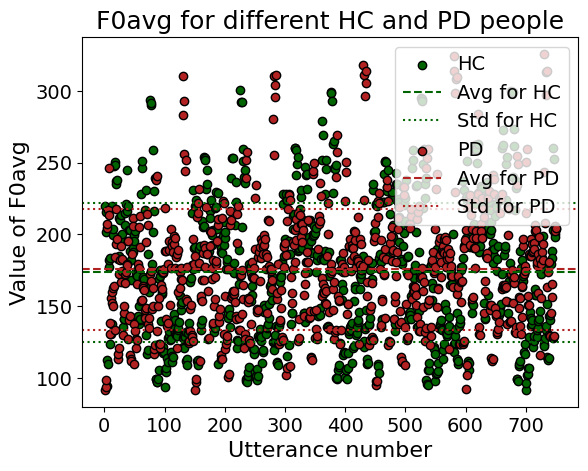

In [8]:
# This plotting works better if you only have one utterance type defined. (t.d one specific vowel/sentence). 
# Not recommended to plot if you have a lot of features, it will take time and might crash.  

want_plots = True # Change to True if you want plots. 
if want_plots: 
    # PD vs HC: Shows every utterence type after each other. 
    
    pd = features_to_plot[features_to_plot['Group'] == class_labels["PD"]]
    hc = features_to_plot[features_to_plot['Group'] == class_labels["HC"]]
    plot_features([hc, pd], ["HC", "PD"], [HC_color, PD_color], patient_info_columns, gaussian = False)

 
The average value and std for F0avg is: 
   Over the 750 female the average was 202.98 and the standard deviation was 37.13
   Over the 750 male the average was 146.04 and the standard deviation was 33.41


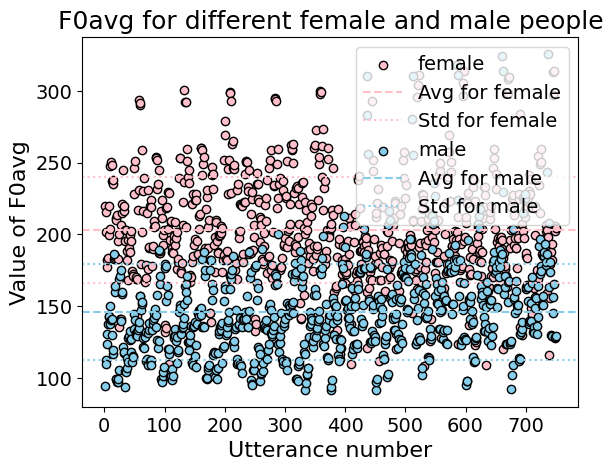

In [9]:
# Plot for gender: 

# This plotting works better if you only have one utterance type defined. (t.d one specific vowel/sentence). 
# Not recommended to plot if you have a lot of features, it will take time and might crash.  

want_plots = True # Change to True if you want plots. 
if want_plots: 
    # Make seperate data for male and female for plotting 
        # Male vs female: Shows first all healty and then all with PD. 
    male = features_to_plot[features_to_plot['Sex'] == 'M']
    female  = features_to_plot[features_to_plot['Sex'] == 'F']
    plot_features([female, male], ["female", "male"], ["pink", "skyblue"], patient_info_columns, gaussian=False)
    

# Histogram of a certain feature type 

3148 PD people, and 3148 HC people


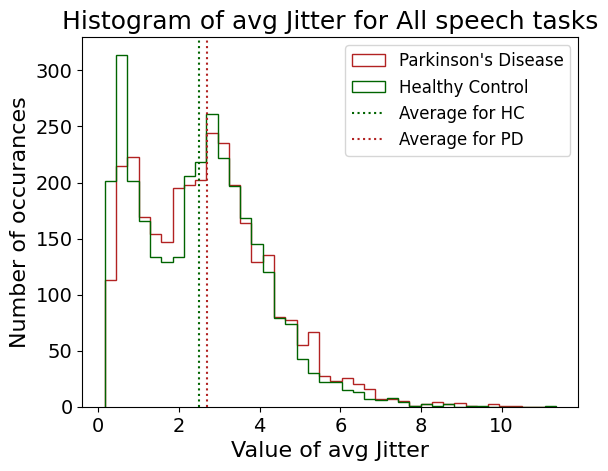

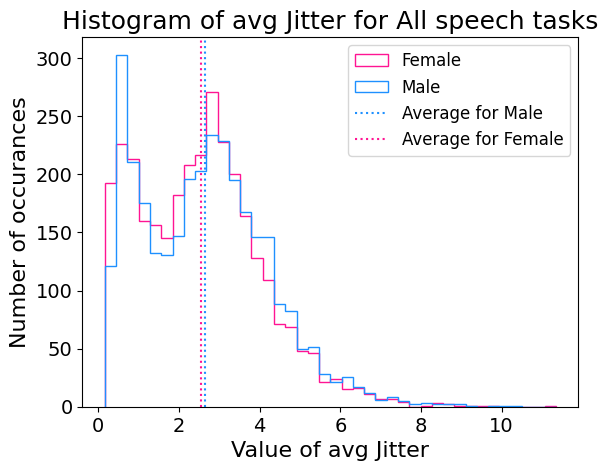

In [10]:
# Information to choose:
feature_types = ["avg Jitter"]  # ["F0avg"]# ["avg apq", "avg Jitter"] 
utterance_type = [""] # ["Vowels", "modulated_vowels"] or etc. 
speech_task = "All speech tasks"
gender_plot = True
specific_utterance = [""] # ["a", "viaje"] or etc.
n_bins = 40 # np.shape(data)[1]//10
######################################################

features_to_plot = features.copy()

if utterance_type != [""]: 
        features_to_plot = features_to_plot[features_to_plot["Utterance type"].isin(utterance_type)]
if specific_utterance != [""]: 
        features_to_plot = features_to_plot[features_to_plot["Utterance"].isin(specific_utterance)]

parkinsons_people = features_to_plot[features_to_plot["Group"] == 1]
healthy_people = features_to_plot[features_to_plot["Group"] == 0]

print(f"{len(parkinsons_people)} PD people, and {len(healthy_people)} HC people")

display()
for f in feature_types:
        pd_plot_features = parkinsons_people.loc[:, f]
        hc_plot_features = healthy_people.loc[:, f]

        data = [np.array(hc_plot_features).flatten(), np.array(pd_plot_features).flatten()]
        
        plt.hist(data, n_bins, histtype='step', fill=False, color=[HC_color, PD_color])
        # plt.hist(data, n_bins, histtype='bar', color=[HC_color, PD_color]) # Bar plot of multiple values together.
        plt.title(f'Histogram of {f} for {speech_task}', fontsize=18)
        plt.xlabel(f"Value of {f}", fontsize=16)
        plt.ylabel("Number of occurances", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)


        plt.axvline(x=np.average(np.array(hc_plot_features)), linestyle=':', color=HC_color)
        plt.axvline(x=np.average(np.array(pd_plot_features)), linestyle=':', color=PD_color)

        plt.legend(['Parkinson\'s Disease', 'Healthy Control', f"Average for HC", f"Average for PD"], fontsize=12)
        plt.show()

if gender_plot:
        male = features_to_plot[features_to_plot["Sex"] == "M"]
        female = features_to_plot[features_to_plot["Sex"] == "F"]
                
        for f in feature_types:
                male_plot_features = male.loc[:, f]
                female_plot_features = female.loc[:, f]

                data = [np.array(male_plot_features).flatten(), np.array(female_plot_features).flatten()]
                plt.hist(data, n_bins, histtype='step', fill=False, color=[male_color, female_color])
                plt.title(f'Histogram of {f} for {speech_task}', fontsize=18)
                plt.xlabel(f"Value of {f}", fontsize=16)
                plt.ylabel("Number of occurances", fontsize=16)
                plt.xticks(fontsize=14)
                plt.yticks(fontsize=14)


                plt.axvline(x=np.average(np.array(male_plot_features)), linestyle=':', color="dodgerblue")
                plt.axvline(x=np.average(np.array(female_plot_features)), linestyle=':', color="deeppink")

                plt.legend(['Female', 'Male', f"Average for Male", f"Average for Female"], fontsize=12)
                plt.show()

# Box plots: 

3148 PD people, and 3148 HC people
3148 PD people, and 3148 HC people


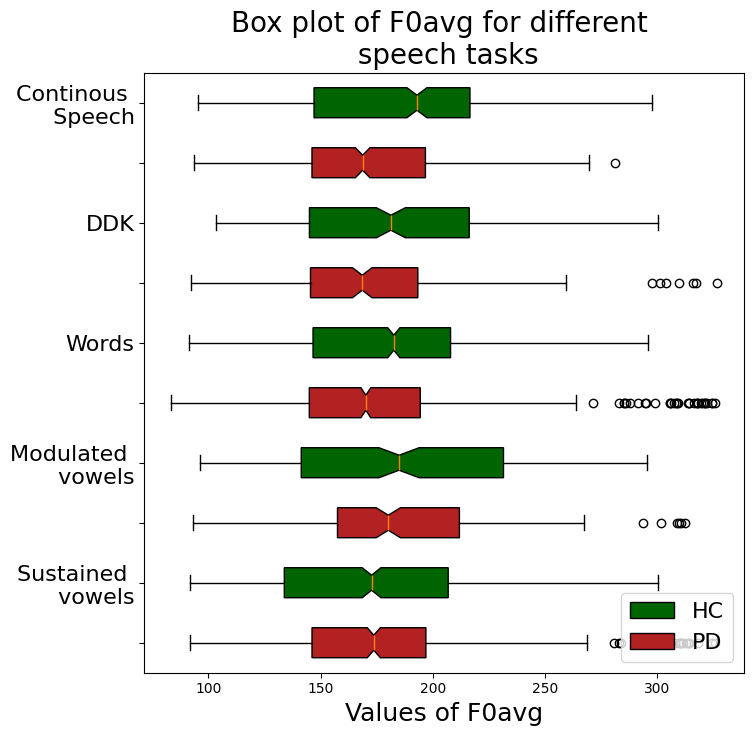

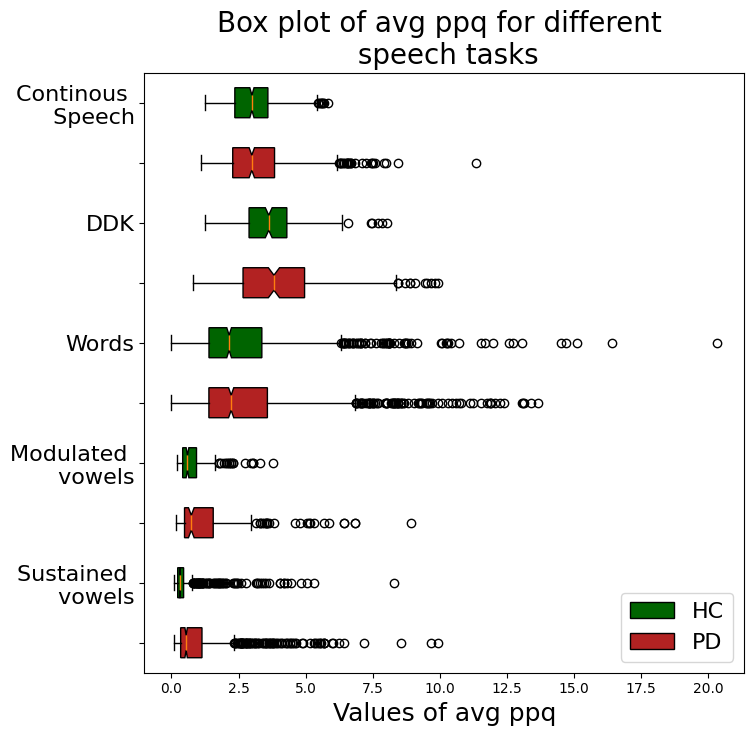

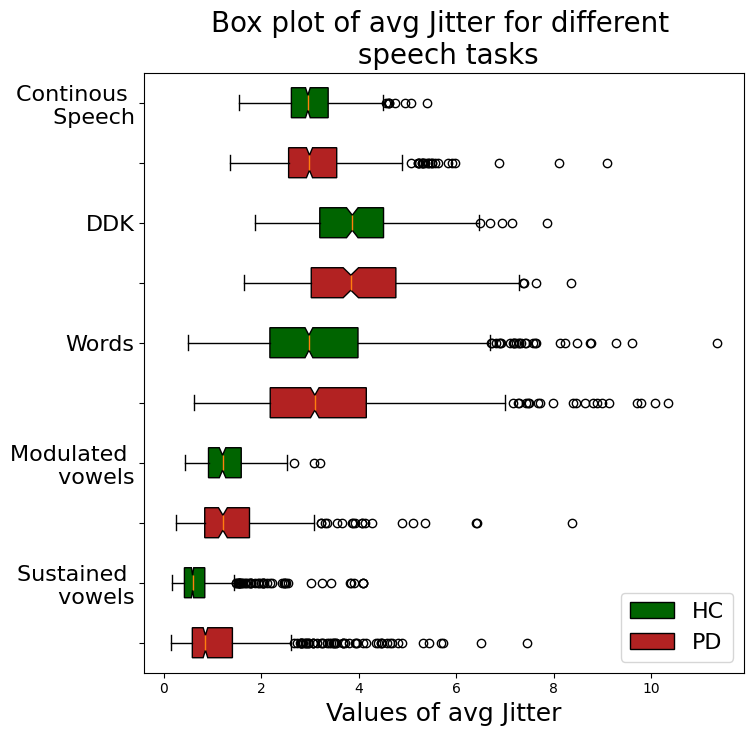

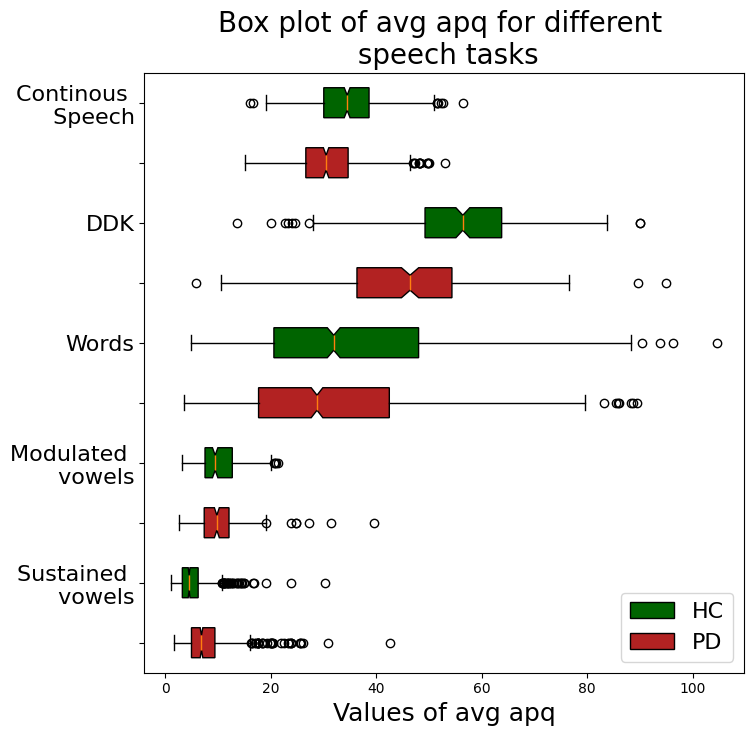

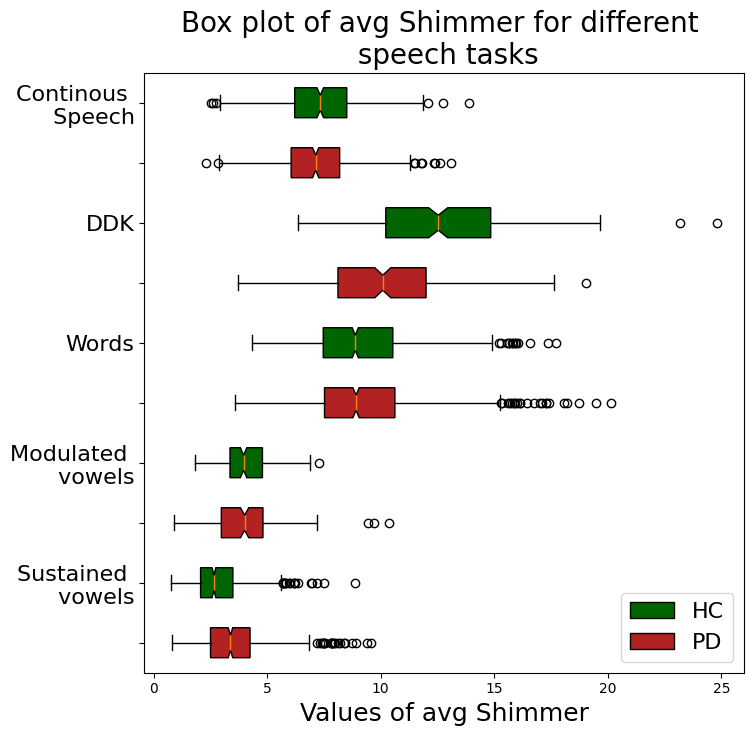

In [11]:
from matplotlib.patches import Patch

# Information to choose:
feature_types = ["F0avg", "avg ppq", "avg Jitter", "avg apq", "avg Shimmer"]# ["avg apq", "avg Jitter"] 

# Code: 
features_to_plot = features.copy()

parkinsons_people = features_to_plot[features_to_plot["Group"] == 1]
healthy_people = features_to_plot[features_to_plot["Group"] == 0]

print(f"{len(parkinsons_people)} PD people, and {len(healthy_people)} HC people")

display()
print(f"{len(parkinsons_people)} PD people, and {len(healthy_people)} HC people")
for f in feature_types:
        vowels_pd = np.array(parkinsons_people[parkinsons_people["Utterance type"] == "Vowels"].loc[:, f]).flatten()
        mod_vowels_pd = np.array(parkinsons_people[parkinsons_people["Utterance type"] == "modulated_vowels"].loc[:, f]).flatten()
        words_pd =  np.array(parkinsons_people[parkinsons_people["Utterance type"] == "Words"].loc[:, f]).flatten()
        ddk_pd =  np.array(parkinsons_people[parkinsons_people["Utterance type"] == "DDK_analysis"].loc[:, f]).flatten()
        contS_pd =  np.array(parkinsons_people[parkinsons_people["Utterance type"].isin(GITA_cont_speech)].loc[:, f]).flatten()
        
        vowels_hc = np.array(healthy_people[healthy_people["Utterance type"] == "Vowels"].loc[:, f]).flatten()
        mod_vowels_hc = np.array(healthy_people[healthy_people["Utterance type"] == "modulated_vowels"].loc[:, f]).flatten()
        words_hc =  np.array(healthy_people[healthy_people["Utterance type"] == "Words"].loc[:, f]).flatten()
        ddk_hc =  np.array(healthy_people[healthy_people["Utterance type"] == "DDK_analysis"].loc[:, f]).flatten()
        contS_hc =  np.array(healthy_people[healthy_people["Utterance type"].isin(GITA_cont_speech)].loc[:, f]).flatten()
        
        data = [vowels_pd, vowels_hc, mod_vowels_pd, mod_vowels_hc, words_pd, words_hc, ddk_pd, ddk_hc, contS_pd, contS_hc]
        colors = [PD_color, HC_color, PD_color, HC_color, PD_color, HC_color, PD_color, HC_color, PD_color, HC_color]
        
        fig = plt.figure(figsize =(6, 6))

        ax = fig.add_axes([0, 0, 1, 1]) # Creating axes instance
        
        
        bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0) # Creating plot
        
        
        for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
        
        ax.set_yticklabels(["", 'Sustained \n vowels', "", "Modulated \n vowels", "", "Words", '', 
                    'DDK', "", "Continous \n Speech"], fontsize = 16)
        ax.set_xlabel(f"Values of {f}", fontsize=18)
        plt.title(f"Box plot of {f} for different \n speech tasks", fontsize=20)
        pd_patch = Patch(facecolor=PD_color, edgecolor='black', label='PD')
        hc_patch = Patch(facecolor=HC_color, edgecolor='black', label='HC')
        plt.legend(handles=[hc_patch, pd_patch], fontsize=16, loc='lower right')
        # show plot
        plt.show()
